In [1]:
import cv2
import numpy as np
import tensorflow as tf
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from dotenv import load_dotenv
from os import environ as env


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_train = "/content/drive/MyDrive/17flowers/train"
dataset_test = "/content/drive/MyDrive/17flowers/test"

In [4]:
#Augmentation  --> im
img_data_generator = ImageDataGenerator(

    rotation_range=10,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,           #normalization - divide each pixels into 255
    validation_split=0.2,
)


train_dataset = img_data_generator.flow_from_directory(
    dataset_train,
    shuffle=True,
    #save_to_dir="/content/drive/MyDrive/aug" ,
    subset="training",
    target_size=(224,224)
)

validation_dataset = img_data_generator.flow_from_directory(
    dataset_test,
    shuffle=True,
    subset="validation",
    target_size=(224,224)
)

Found 823 images belonging to 17 classes.
Found 65 images belonging to 17 classes.


In [5]:
model = tf.keras.models.Sequential([
    # stride = number of pixels movement in hovering kernel = گام حرکت
    #Feature Extraction
    # tf.keras.layers.Conv2D( filters=32 , kernel_size=(3,3) , strides=(2,2) , activation="relu" , padding="same" , input_shape=(224,224,3) ),
    tf.keras.layers.Conv2D( filters=64 , kernel_size=(3,3) , strides=(2,2) , activation="relu", padding="same" , input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Conv2D( filters=64 , kernel_size=(3,3) , strides=(2,2) , activation="relu" , padding="same"),
    tf.keras.layers.Conv2D( filters=128 , kernel_size=(3,3) , strides=(1,1) , activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D( filters=256 , kernel_size=(3,3) , strides=(1,1) , activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),


    # Feature Array
    tf.keras.layers.Flatten(),

    #tf.keras.layers.Dense(4096 , activation="relu"),
    tf.keras.layers.Dense(512 , activation="relu"),
    # tf.keras.layers.Dense(256 , activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(17    , activation="softmax")
    ])

In [6]:
model.compile(optimizer= tf.keras.optimizers.Nadam() , loss= tf.keras.losses.categorical_crossentropy , metrics="accuracy")

# train_dataset contains x_train & y_train
history = model.fit(train_dataset , validation_data=validation_dataset , epochs=50 )
# train and evaluation in parallel mode



Epoch 1/50
26/26 [==============================] - 247s 9s/step - loss: 2.8283 - accuracy: 0.0899 - val_loss: 2.5810 - val_accuracy: 0.1231
Epoch 2/50
26/26 [==============================] - 15s 568ms/step - loss: 2.5121 - accuracy: 0.1312 - val_loss: 2.3284 - val_accuracy: 0.2769
Epoch 3/50
26/26 [==============================] - 15s 591ms/step - loss: 2.3234 - accuracy: 0.2066 - val_loss: 2.1804 - val_accuracy: 0.2462
Epoch 4/50
26/26 [==============================] - 15s 594ms/step - loss: 2.1039 - accuracy: 0.2892 - val_loss: 1.9185 - val_accuracy: 0.3077
Epoch 5/50
26/26 [==============================] - 15s 594ms/step - loss: 1.9176 - accuracy: 0.3621 - val_loss: 1.6750 - val_accuracy: 0.4154
Epoch 6/50
26/26 [==============================] - 15s 587ms/step - loss: 1.7635 - accuracy: 0.4070 - val_loss: 1.6691 - val_accuracy: 0.4154
Epoch 7/50
26/26 [==============================] - 15s 590ms/step - loss: 1.6557 - accuracy: 0.4508 - val_loss: 1.6615 - val_accuracy: 0.3385
E

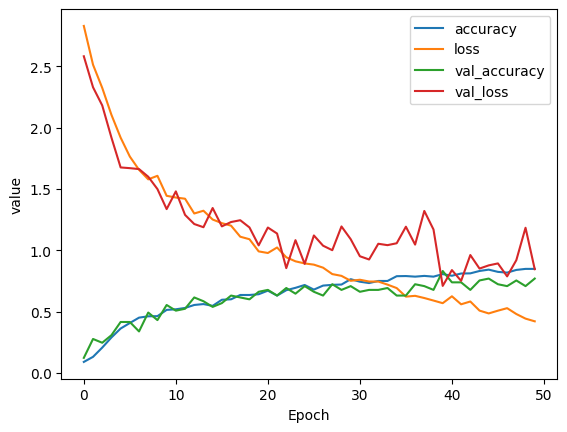

In [7]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["val_loss"])
plt.legend(["accuracy","loss" , "val_accuracy" , "val_loss"])
plt.xlabel("Epoch")
plt.ylabel("value")
plt.show()

In [8]:
model.save("/content/weights.h5")
model.save("/content/weights.keras")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [82]:
loss , accuracy = model.evaluate(validation_dataset)
loss , accuracy

3/3 [==============================] - 2s 403ms/step - loss: 0.7803 - accuracy: 0.7692


(0.7803226113319397, 0.7692307829856873)

In [83]:
ypred = model.predict(validation_dataset)


3/3 [==============================] - 1s 234ms/step


In [84]:
ypred.shape

(65, 17)

In [85]:
ypred_list = []
for i in range(65) :
    ypred_list.append(np.argmax(ypred[i]))
np.array(ypred_list)


array([ 3,  9, 16,  6,  9,  9,  9, 11,  6,  8,  1, 16,  9,  5,  1, 16,  9,
        9,  3,  6,  9,  2,  5,  5, 11,  7,  9,  1,  1,  7,  5,  5, 13,  2,
       10, 10,  1, 16,  7, 11, 13, 15, 14,  2,  1, 15,  7, 14, 16,  1, 15,
        7, 16, 12,  8, 11, 11,  4,  6,  3, 13,  9, 16,  8,  3])

In [86]:
validation_dataset.labels

array([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,
        4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,
        8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
       13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16],
      dtype=int32)

In [ ]:
images,labels = validation_dataset[0]
ypred_list = []
for image in images:
    image = np.expand_dims(image, axis=0)
    ypred=model.predict(image)
    ypred_list.append(np.argmax(ypred))


In [88]:
validation_dataset.batch_size

32

In [89]:
ytrue_list = []
for label in labels:
    ytrue_list.append(np.argmax(label))
np.array(ytrue_list)

array([ 8,  6, 13, 14, 10,  0,  8,  8,  7, 14, 11, 12,  3, 16,  0, 10, 16,
        1, 16,  6, 13,  5,  1,  3, 15, 15,  9,  7,  1, 14, 11,  8])

In [90]:
np.array(ytrue_list).shape

(32,)

In [91]:
np.array(ypred_list)

array([ 9,  6, 13, 14, 12,  4,  8,  8,  7, 14,  1, 12, 12, 16,  0, 12, 16,
        1, 16,  6, 13,  5,  1,  3, 15,  5,  9,  7,  1, 14, 11,  8])

In [92]:
confm = confusion_matrix(y_true= ytrue_list , y_pred= ypred_list )
confm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]])

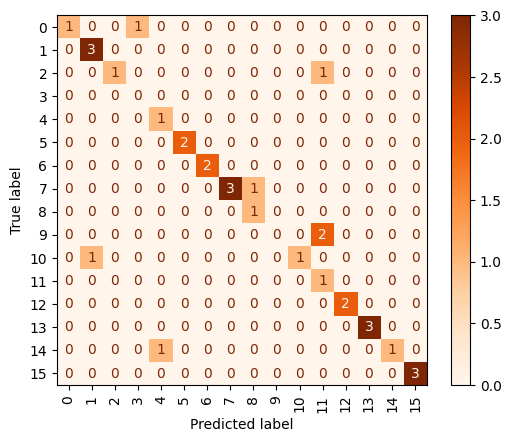

In [93]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confm )
cm_display.plot(cmap=plt.cm.Oranges , xticks_rotation="vertical")
plt.show()

## Inference

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
image = Image.open("/content/cu.jpg")
new_image = image.resize((224,224))
new_image.save("/content/image.jpg")
plt.imshow(new_image)

In [ ]:
new_image = cv2.imread("/content/image.jpg" , 0)
new_image = cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB)
print(new_image.shape)
img = np.reshape(new_image, [1, 224, 224, 3])
print(img.shape)
output = model.predict(img)

predicted_class = np.argmax(output)
print(predicted_class)
print(train_dataset.class_indices)
print(np.argmax(output))
mylist = list(train_dataset.class_indices)
print("predicted label : " , mylist[np.argmax(output)])


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

model = load_model("/content/weights.keras")
output = model.predict(img)

predicted_class = np.argmax(output)
# print(output)
print(predicted_class)
print(train_dataset.class_indices)
# print(train_dataset.classes)
print(np.argmax(output))
mylist = list(train_dataset.class_indices)
print("predicted label : " , mylist[np.argmax(output)])


In [ ]:
!pip install pyTelegramBotAPI
!pip install telegram
!pip install git+https://github.com/eternnoir/pyTelegramBotAPI.git
!pip install pytesseract

In [ ]:
import telebot
load_dotenv()
token = os.getenv('TOKEN')
bot = telebot.TeleBot(token)
from telebot import types
from telegram import *
import telebot
import pytesseract
from keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras import models
from PIL import Image
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input


model = load_model("/content/weights.keras")


@bot.message_handler(commands=['start']) #decorator
def send_welcome(message):

  bot.send_message(message.chat.id , "🌼 Hi Dear " + message.from_user.first_name +"🌼"+ "\nWelcome to Flower Recognition bot ")
  FL_recognizer(message)


counter = 0
@bot.message_handler()
def FL_recognizer(message):
    global counter
    if counter == 0 :
      initial_message = bot.send_message(message.chat.id, "Upload a Flower image 🔄 ... " + "\nAnd wait for it's Name " )
      bot.register_next_step_handler(initial_message , flower_recognizer)
      counter += 1
    elif counter != 0 :
      initial_message = bot.send_message(message.chat.id, "Do you still want to continue ?😃 \nSo Upload another image 🔄🌸🌻 ... " )
      bot.register_next_step_handler(initial_message , flower_recognizer)
def flower_recognizer(message):
	  # Get file id
    file_id = message.photo[-1].file_id
    # Get file path
    file_path = bot.get_file(file_id).file_path
    # Download file
    downloaded_file = bot.download_file(file_path)
    # Save file
    try:
        with open("image.jpg", 'wb') as new_file:
            new_file.write(downloaded_file)
    except Exception as e:
        bot.reply_to(message, "Error saving file.")
        return

    # Open image
    try:
        image = Image.open("image.jpg")
    except Exception as e:
        bot.reply_to(message, "Error opening file.")
        return

    # Get text from image
    #bot.send_photo(chat_id=message.chat.id, photo=image)
    # file = context.bot.get_file(update.message.document.file_id)


    image = load_img("image.jpg" , target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    output = model.predict(image)
    predicted_class = np.argmax(output)
    print(predicted_class)
    mylist = list(train_dataset.class_indices)
    print("predicted label : " , mylist[np.argmax(output)])
    bot.send_message(message.chat.id,  mylist[np.argmax(output)])
    FL_recognizer(message)


In [ ]:
bot.infinity_polling()